# DNN Keras MNIST

In [ ]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear  
# inline in the notebook rather than in a new window.
%matplotlib inline

# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] loading MNIST (full) dataset...")
dataset = datasets.fetch_mldata("MNIST Original")
# scale the raw pixel intensities to the range [0, 1.0], then
# construct the training and testing splits
data = dataset.data.astype("float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data, dataset.target, test_size=0.25)

In [ ]:
# convert the labels from integers to vectors
labelBinarizer = LabelBinarizer()
trainY = labelBinarizer.fit_transform(trainY)
testY = labelBinarizer.fit_transform(testY)

In [ ]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=classes))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1711
           1       0.95      0.97      0.96      2025
           2       0.91      0.91      0.91      1746
           3       0.92      0.89      0.90      1745
           4       0.91      0.93      0.92      1699
           5       0.90      0.88      0.89      1591
           6       0.94      0.95      0.94      1775
           7       0.95      0.93      0.94      1805
           8       0.90      0.87      0.88      1716
           9       0.88      0.92      0.90      1687

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



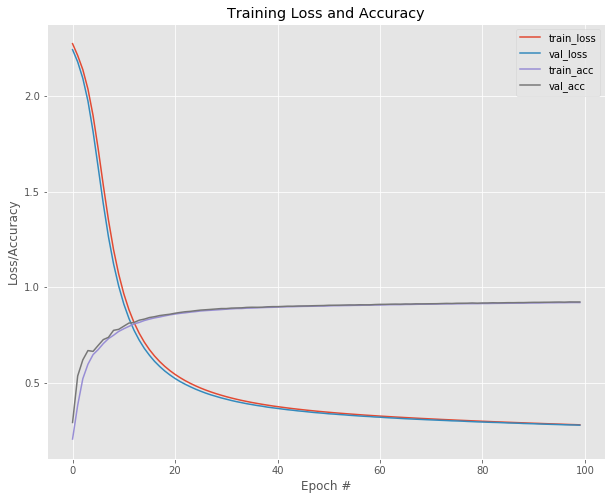

In [10]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Well Done